## Census API Example
This example only works with an api key: https://www.census.gov/developers/.
You can run it a limited number of times without a key; comment out block 2 and remove &key={api_key} from the data_url string in block 5

In [1]:
#Pull data from Population Estimates Vintage 2018
%matplotlib inline
import requests,pandas as pd

In [2]:
with open('census_key.txt') as key:
    api_key=key.read().strip()

In [3]:
year='2018'
dsource='pep'
dname='components'
cols='GEONAME,NATURALINC,DOMESTICMIG,INTERNATIONALMIG'
state='42'
county='017,029,045,091,101'
#state='34'
#county='005,007,015,021'

In [4]:
base_url = f'https://api.census.gov/data/{year}/{dsource}/{dname}'
base_url

'https://api.census.gov/data/2018/pep/components'

In [5]:
data_url = f'{base_url}?get={cols}&for=county:{county}&in=state:{state}&key={api_key}'
response=requests.get(data_url)
print(response.text)

[["GEONAME","NATURALINC","DOMESTICMIG","INTERNATIONALMIG","state","county"],
["Bucks County, Pennsylvania","-178","-605","862","42","017"],
["Chester County, Pennsylvania","1829","-887","1374","42","029"],
["Delaware County, Pennsylvania","1374","-2513","1579","42","045"],
["Montgomery County, Pennsylvania","1230","-1987","2315","42","091"],
["Philadelphia County, Pennsylvania","8617","-11796","8904","42","101"]]


In [6]:
data=response.json()
df=pd.DataFrame(data[1:], columns=data[0]).\
    rename(columns={"NATURALINC": "Natural Increase", "DOMESTICMIG": "Net Domestic Mig", "INTERNATIONALMIG":"Net Foreign Mig"})
df['fips']=df.state+df.county
df.set_index('fips',inplace=True)
df.drop(columns=['state','county'],inplace=True)
df=df.astype(dtype={'Natural Increase':'int64','Net Domestic Mig':'int64','Net Foreign Mig':'int64'},inplace=True)
df

,GEONAME,Natural Increase,Net Domestic Mig,Net Foreign Mig
fips,,,,
42017,"Bucks County, Pennsylvania",-178,-605,862
42029,"Chester County, Pennsylvania",1829,-887,1374
42045,"Delaware County, Pennsylvania",1374,-2513,1579
42091,"Montgomery County, Pennsylvania",1230,-1987,2315
42101,"Philadelphia County, Pennsylvania",8617,-11796,8904


In [7]:
#Total population change 2017-2018
df.sum(axis=1)

fips
42017      79
42029    2316
42045     440
42091    1558
42101    5725
dtype: int64

Text(0.5, 0, '')

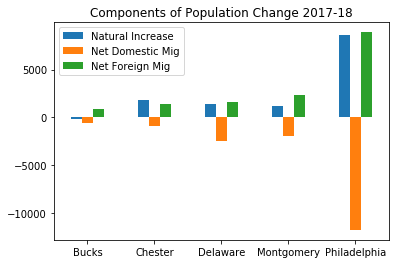

In [8]:
labels=df['GEONAME'].str.split(' ',expand=True)[0]
ax=df.plot.bar(rot=0, title='Components of Population Change 2017-18')
ax.set_xticklabels(labels)
ax.set_xlabel('')